In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Load the dataset
df = pd.read_csv('dirty_eda_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer_ID      21 non-null     object
 1   Customer_Name    42 non-null     object
 2   Age              41 non-null     object
 3   Gender           31 non-null     object
 4   Country          32 non-null     object
 5   Purchase_Amount  46 non-null     object
 6   Payment_Method   30 non-null     object
 7   Join_Date        22 non-null     object
 8   Feedback         35 non-null     object
 9   Repeat_Customer  36 non-null     object
dtypes: object(10)
memory usage: 4.0+ KB


In [4]:
#Checks for null values
df.isnull().sum()

,0
Customer_ID,29
Customer_Name,8
Age,9
Gender,19
Country,18
Purchase_Amount,4
Payment_Method,20
Join_Date,28
Feedback,15
Repeat_Customer,14


In [5]:
#Prints out the rows with the null values
df[df['Customer_ID'].isnull()]

,Customer_ID,Customer_Name,Age,Gender,Country,Purchase_Amount,Payment_Method,Join_Date,Feedback,Repeat_Customer
1,NaN,mary,40,female,India,200,NaN,2025-01-15,excellent,Y
4,NaN,jane smith,30,FEMALE,nigeria,200,cash,NaN,excellent,Yes
5,NaN,bob Brown,40,NaN,USA,200,NaN,NaN,average,N
6,NaN,NaN,50,Male,NaN,300,NaN,NaN,bad,NaN
8,NaN,mary,50,FEMALE,NaN,100,NaN,29/02/2024,average,No
9,NaN,mary,50,female,nigeria,500,Credit Card,2021-06-10,bad,N
10,NaN,bob Brown,25,NaN,uk,Three Hundred,NaN,NaN,Good,Y
16,NaN,mary,40,FEMALE,nigeria,200,paypal,NaN,NaN,NaN
17,NaN,Alice Johnson,30,Male,nigeria,400,cash,2021-04-21,excellent,N
18,NaN,bob Brown,NaN,male,NaN,300,NaN,NaN,average,Yes


In [30]:
#Generates and updates the Customer_ID
df["Customer_ID"] = ["CUST" + str(i).zfill(3) for i in range(1, df.shape[0] + 1)]

In [31]:
#Returns text based columns that'll need to be standardized
df.select_dtypes(include=['object']).columns

Index(['Customer_ID', 'Customer_Name', 'Age', 'Gender', 'Country',
       'Purchase_Amount', 'Payment_Method', 'Join_Date', 'Feedback',
       'Repeat_Customer'],
      dtype='object')

In [17]:
df.head(20)

,Customer_ID,Customer_Name,Age,Gender,Country,Purchase_Amount,Payment_Method,Join_Date,Feedback,Repeat_Customer
0,CUST001,jane smith,30,FEMALE,nigeria,500,NaN,08/05/2023,excellent,Yes
1,CUST002,mary,40,female,India,200,NaN,2025-01-15,excellent,Y
2,CUST003,bob Brown,NaN,NaN,nigeria,200,Credit Card,NaN,excellent,N
3,CUST004,John Doe,30,Male,USA,400,Credit Card,NaN,NaN,Yes
4,CUST005,jane smith,30,FEMALE,nigeria,200,cash,NaN,excellent,Yes
5,CUST006,bob Brown,40,NaN,USA,200,NaN,NaN,average,N
6,CUST007,NaN,50,Male,NaN,300,NaN,NaN,bad,NaN
7,CUST008,mary,25,NaN,NaN,200,debit card,NaN,average,Yes
8,CUST009,mary,50,FEMALE,NaN,100,NaN,29/02/2024,average,No
9,CUST010,mary,50,female,nigeria,500,Credit Card,2021-06-10,bad,N


In [32]:
#Remove duplicates
df.drop_duplicates()

,Customer_ID,Customer_Name,Age,Gender,Country,Purchase_Amount,Payment_Method,Join_Date,Feedback,Repeat_Customer
0,CUST001,jane smith,30,FEMALE,nigeria,500,NaN,08/05/2023,excellent,Yes
1,CUST002,mary,40,female,India,200,NaN,2025-01-15,excellent,Y
2,CUST003,bob Brown,NaN,NaN,nigeria,200,Credit Card,NaN,excellent,N
3,CUST004,John Doe,30,Male,USA,400,Credit Card,NaN,NaN,Yes
4,CUST005,jane smith,30,FEMALE,nigeria,200,cash,NaN,excellent,Yes
5,CUST006,bob Brown,40,NaN,USA,200,NaN,NaN,average,N
6,CUST007,NaN,50,Male,NaN,300,NaN,NaN,bad,NaN
7,CUST008,mary,25,NaN,NaN,200,debit card,NaN,average,Yes
8,CUST009,mary,50,FEMALE,NaN,100,NaN,29/02/2024,average,No
9,CUST010,mary,50,female,nigeria,500,Credit Card,2021-06-10,bad,N


In [33]:
#Replaces all NaN cells with Unknown Customer
df['Customer_Name'] = df['Customer_Name'].fillna('Unknown Customer')

In [37]:
#makes the first letter of the entire string uppercase
df['Customer_Name'] = df['Customer_Name'].str.title()
df['Gender'] = df['Gender'].str.title()
df['Country'] = df['Country'].str.title()
df['Feedback'] = df['Feedback'].str.title()
df['Payment_Method'] = df['Payment_Method'].str.title()

In [35]:
#Updates ir-regular text
df['Repeat_Customer'] = df['Repeat_Customer'].replace({'Y': 'Yes', 'N': 'No'})
df['Purchase_Amount'] = df['Purchase_Amount'].replace({'Three Hundred': '300'})
df['Repeat_Customer'] = df['Repeat_Customer'].fillna('No Record')

In [48]:
#Displays the Join_Date in the correct format
df['Join_Date'] = pd.to_datetime(df['Join_Date'], errors='coerce', dayfirst=True)
df['Join_Date'] = df['Join_Date'].dt.strftime('%Y-%m-%d')
df['Join_Date'] = df['Join_Date'].fillna('No Record')

Text(0, 0.5, 'Count')

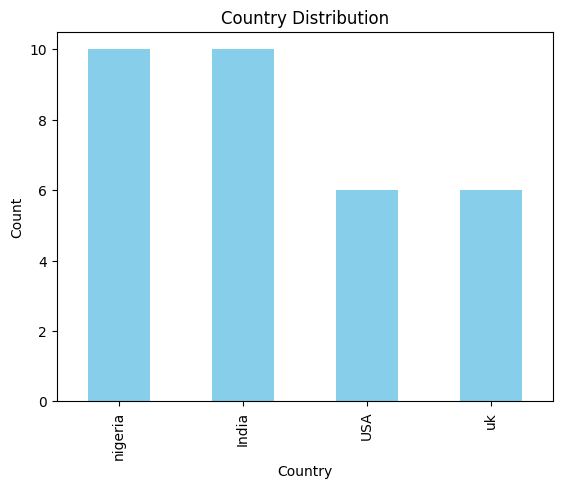

In [62]:
df['Country'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')

This bar chart shows which country has the highest number of Customers, with Nigeria and India the same amount of Customers

Text(0.5, 1.0, 'Payment Method Distribution')

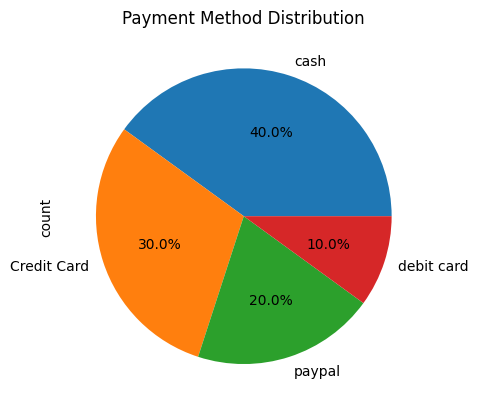

In [54]:
df['Payment_Method'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Method Distribution')

The pie chart displays what payment method is more used by Customers when making payment.

Text(0.5, 1.0, 'Customer Feedback Sentiment')

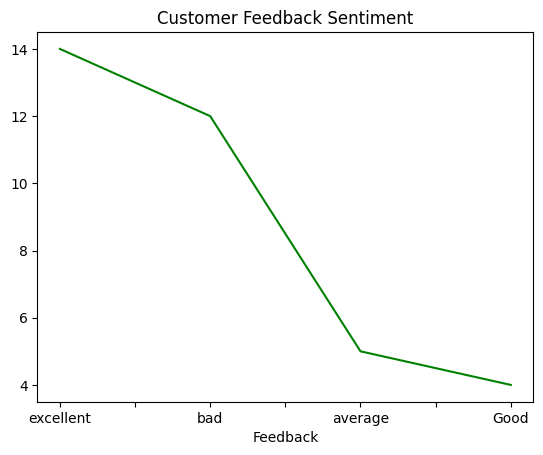

In [65]:
df['Feedback'].value_counts().plot(kind='line', color='green')
plt.title('Customer Feedback Sentiment')


The Customer Feedback Sentiment Chart shows us that most Customers live an excellent review

In [61]:
from google.colab import files
df.to_csv('my_data.csv', index=False)
files.download('my_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>